In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize

In [29]:
df=pd.read_csv('CC GENERAL.csv')

In [30]:
# preprocessing

In [31]:
df.head(5)

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0  C10001    40.900749  ...          0.000000      12
1  C10002  3202.467416  ...          0.222222      12
2  C10003  2495.148862  ...          0.000000      12
3  C10004  1666.670542  ...          0.000000      12
4  C10005   817.714335  ...          0.000000      12

[5 rows x 18 columns]

In [32]:
df.describe()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT       TENURE
count   8950.000000        8950.000000  ...       8950.000000  8950.000000
mean    1564.474828           0.877271  ...          0.153715    11.517318
std     2081.531879           0.236904  ...          0.292499     1.338331
min        0.000000           0.000000  ...          0.000000     6.000000
25%      128.281915           0.888889  ...          0.000000    12.000000
50%      873.385231           1.000000  ...          0.000000    12.000000
75%     2054.140036           1.000000  ...          0.142857    12.000000
max    19043.138560           1.000000  ...          1.000000    12.000000

[8 rows x 17 columns]

In [33]:
df.shape

(8950, 18)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [35]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [36]:
#replacing missing values and drop the id column
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median()) 

In [37]:
df.isnull().sum().sum()

0

In [38]:
df=df.drop("CUST_ID", axis = 1)

In [39]:
# visualisation

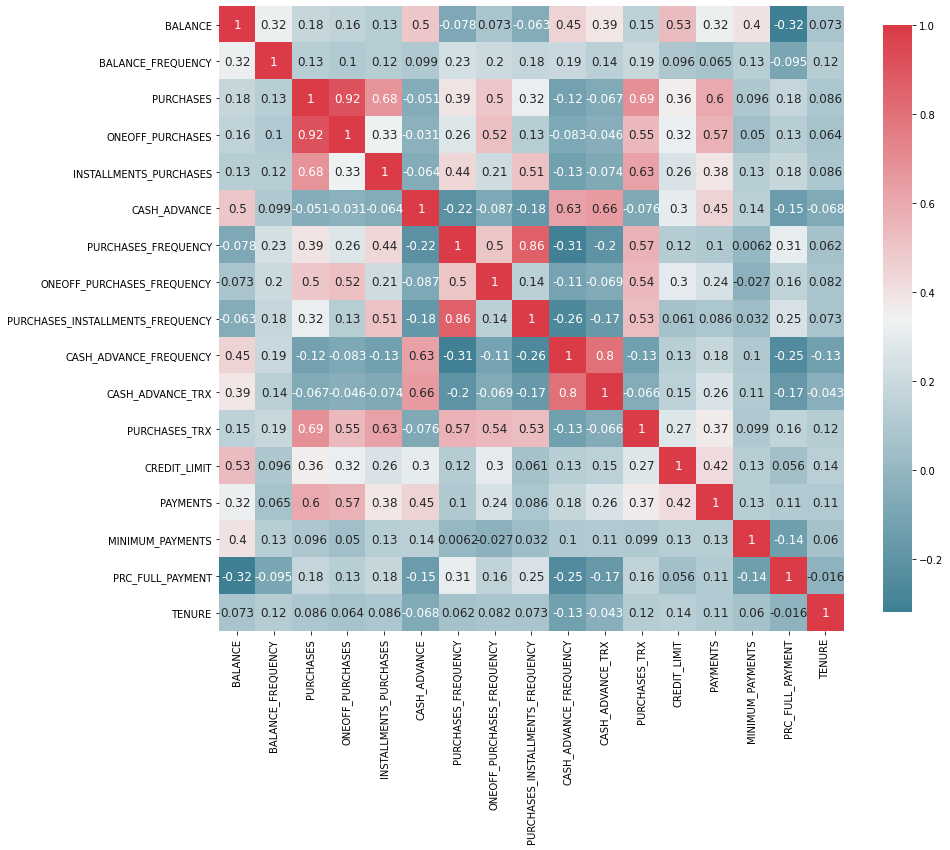

In [40]:
# heatmap
import matplotlib.pyplot as plt
import seaborn as sns
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 14 , 12 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

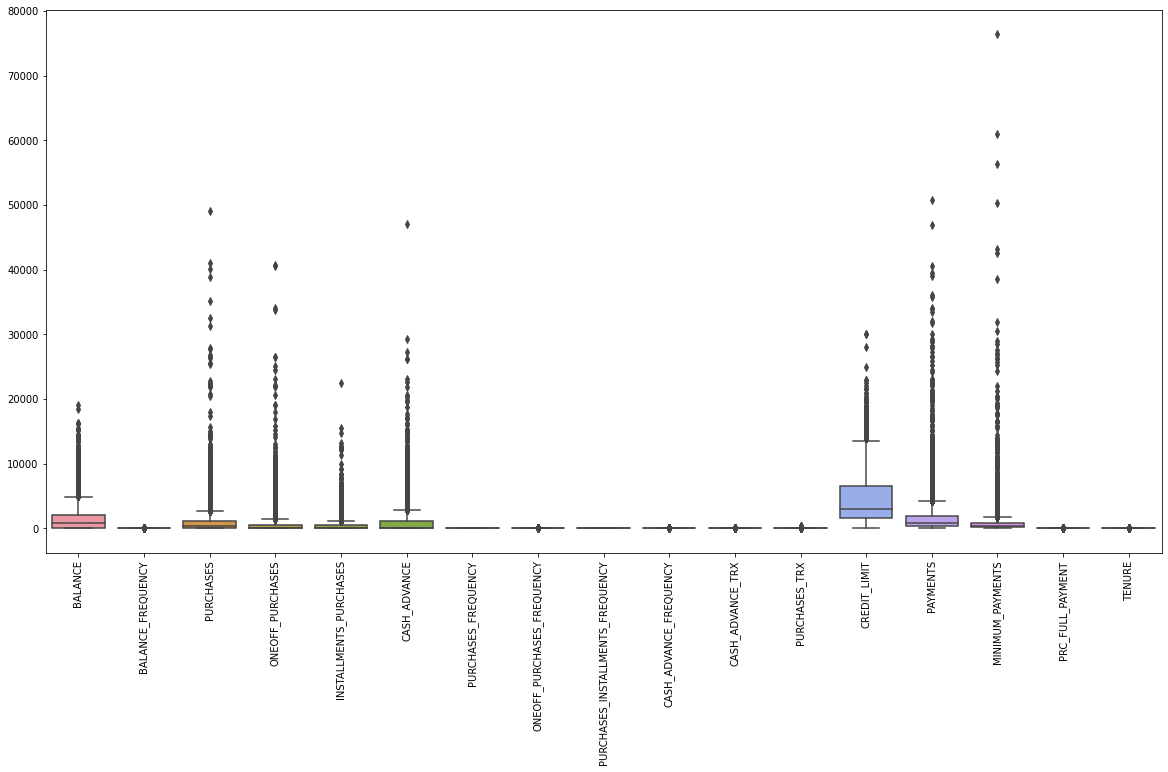

In [41]:
# boxplot
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [42]:
# we notice that this dataset is full of outliers , so we have to drop them to get a more effective model 
# so lets use z-score to drop them

In [43]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
print(z)

threshold = 3
print(np.where(z > 3))

df = df[(z < 3).all(axis=1)]

[[0.73198937 0.24943448 0.42489974 ... 0.3024     0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.09749953 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.0932934  0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.32687479 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.33830497 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.3243581  0.52555097 4.12276757]]
(array([   6,   19,   20, ..., 8947, 8948, 8949]), array([ 3, 14, 14, ..., 16, 16, 16]))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

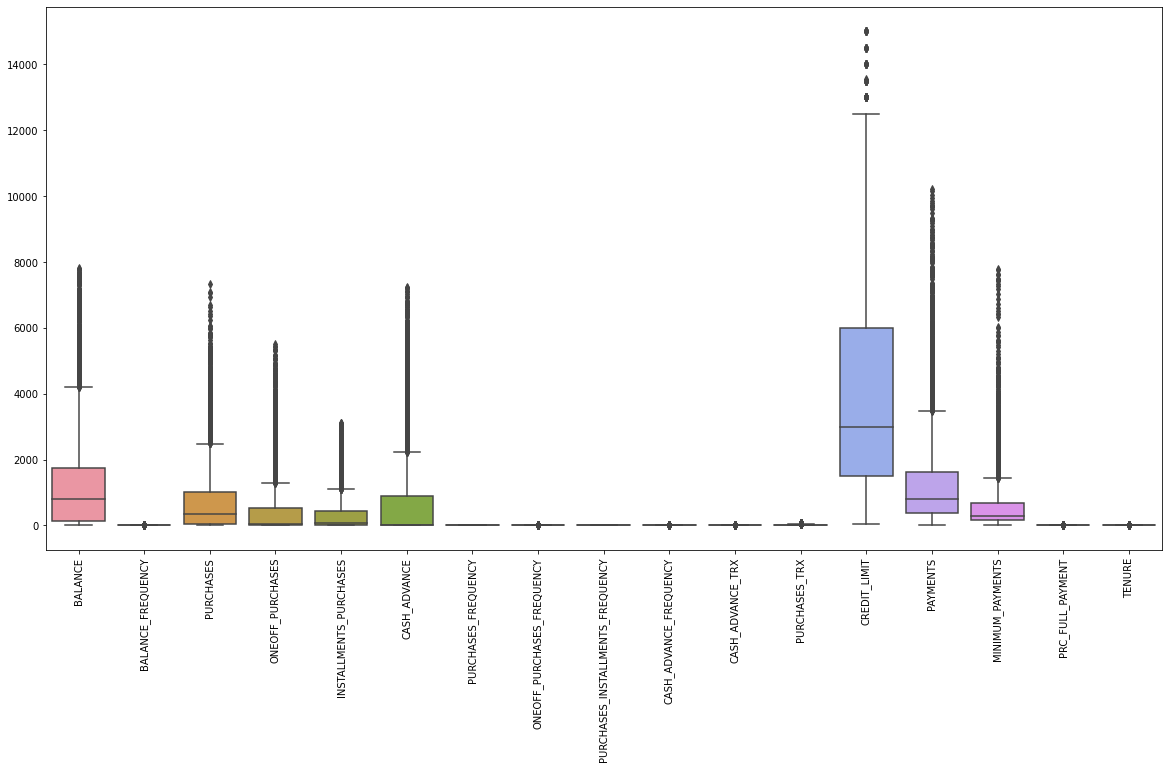

In [44]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [45]:
# scaling (0-1) to help our model find the hidden patterns
df_scaled = normalize(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns )

In [46]:
df_scaled.head()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT    TENURE
0  0.039353           0.000787  ...           0.00000  0.011546
1  0.293876           0.000083  ...           0.00002  0.001101
2  0.310798           0.000125  ...           0.00000  0.001495
3  0.208886           0.000080  ...           0.00000  0.001504
4  0.504284           0.000617  ...           0.00000  0.007400

[5 rows x 17 columns]

In [47]:
# hierarchical clustering :

In [48]:
X = df_scaled.iloc[:, [0, 13]].values 
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
Y = model.fit_predict(X) 

In [51]:
# Plot the dendrogram. Use k-means clustering :

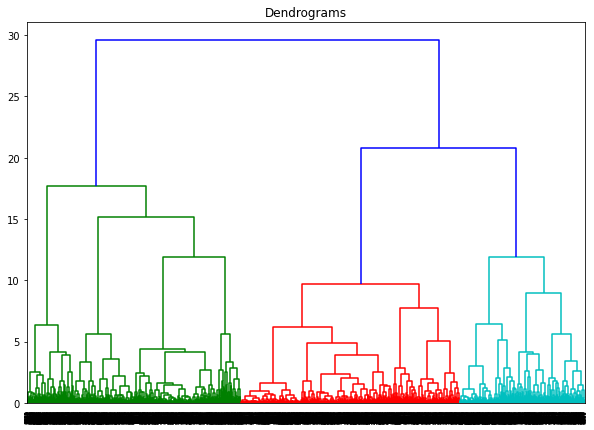

In [52]:
# the dendrogram :
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

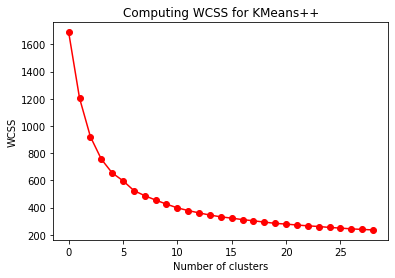

In [53]:
# using elbow methode to find the best k value
from sklearn.cluster import KMeans

wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( df_scaled )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [54]:
# we notice that the best k values are between 5 and 8 
# in this case i will take k=5

In [56]:
model = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300) 
y_pred = model.fit_predict( df_scaled )

In [59]:
model = KMeans(n_clusters=6, init="k-means++", n_init=10, max_iter=300) 
y_pred2 = model.fit_predict( df_scaled )

In [60]:
model = KMeans(n_clusters=7, init="k-means++", n_init=10, max_iter=300) 
y_pred3 = model.fit_predict( df_scaled )

In [ ]:
# the best k value is 7 and we can notice that bu ploting the clusters :

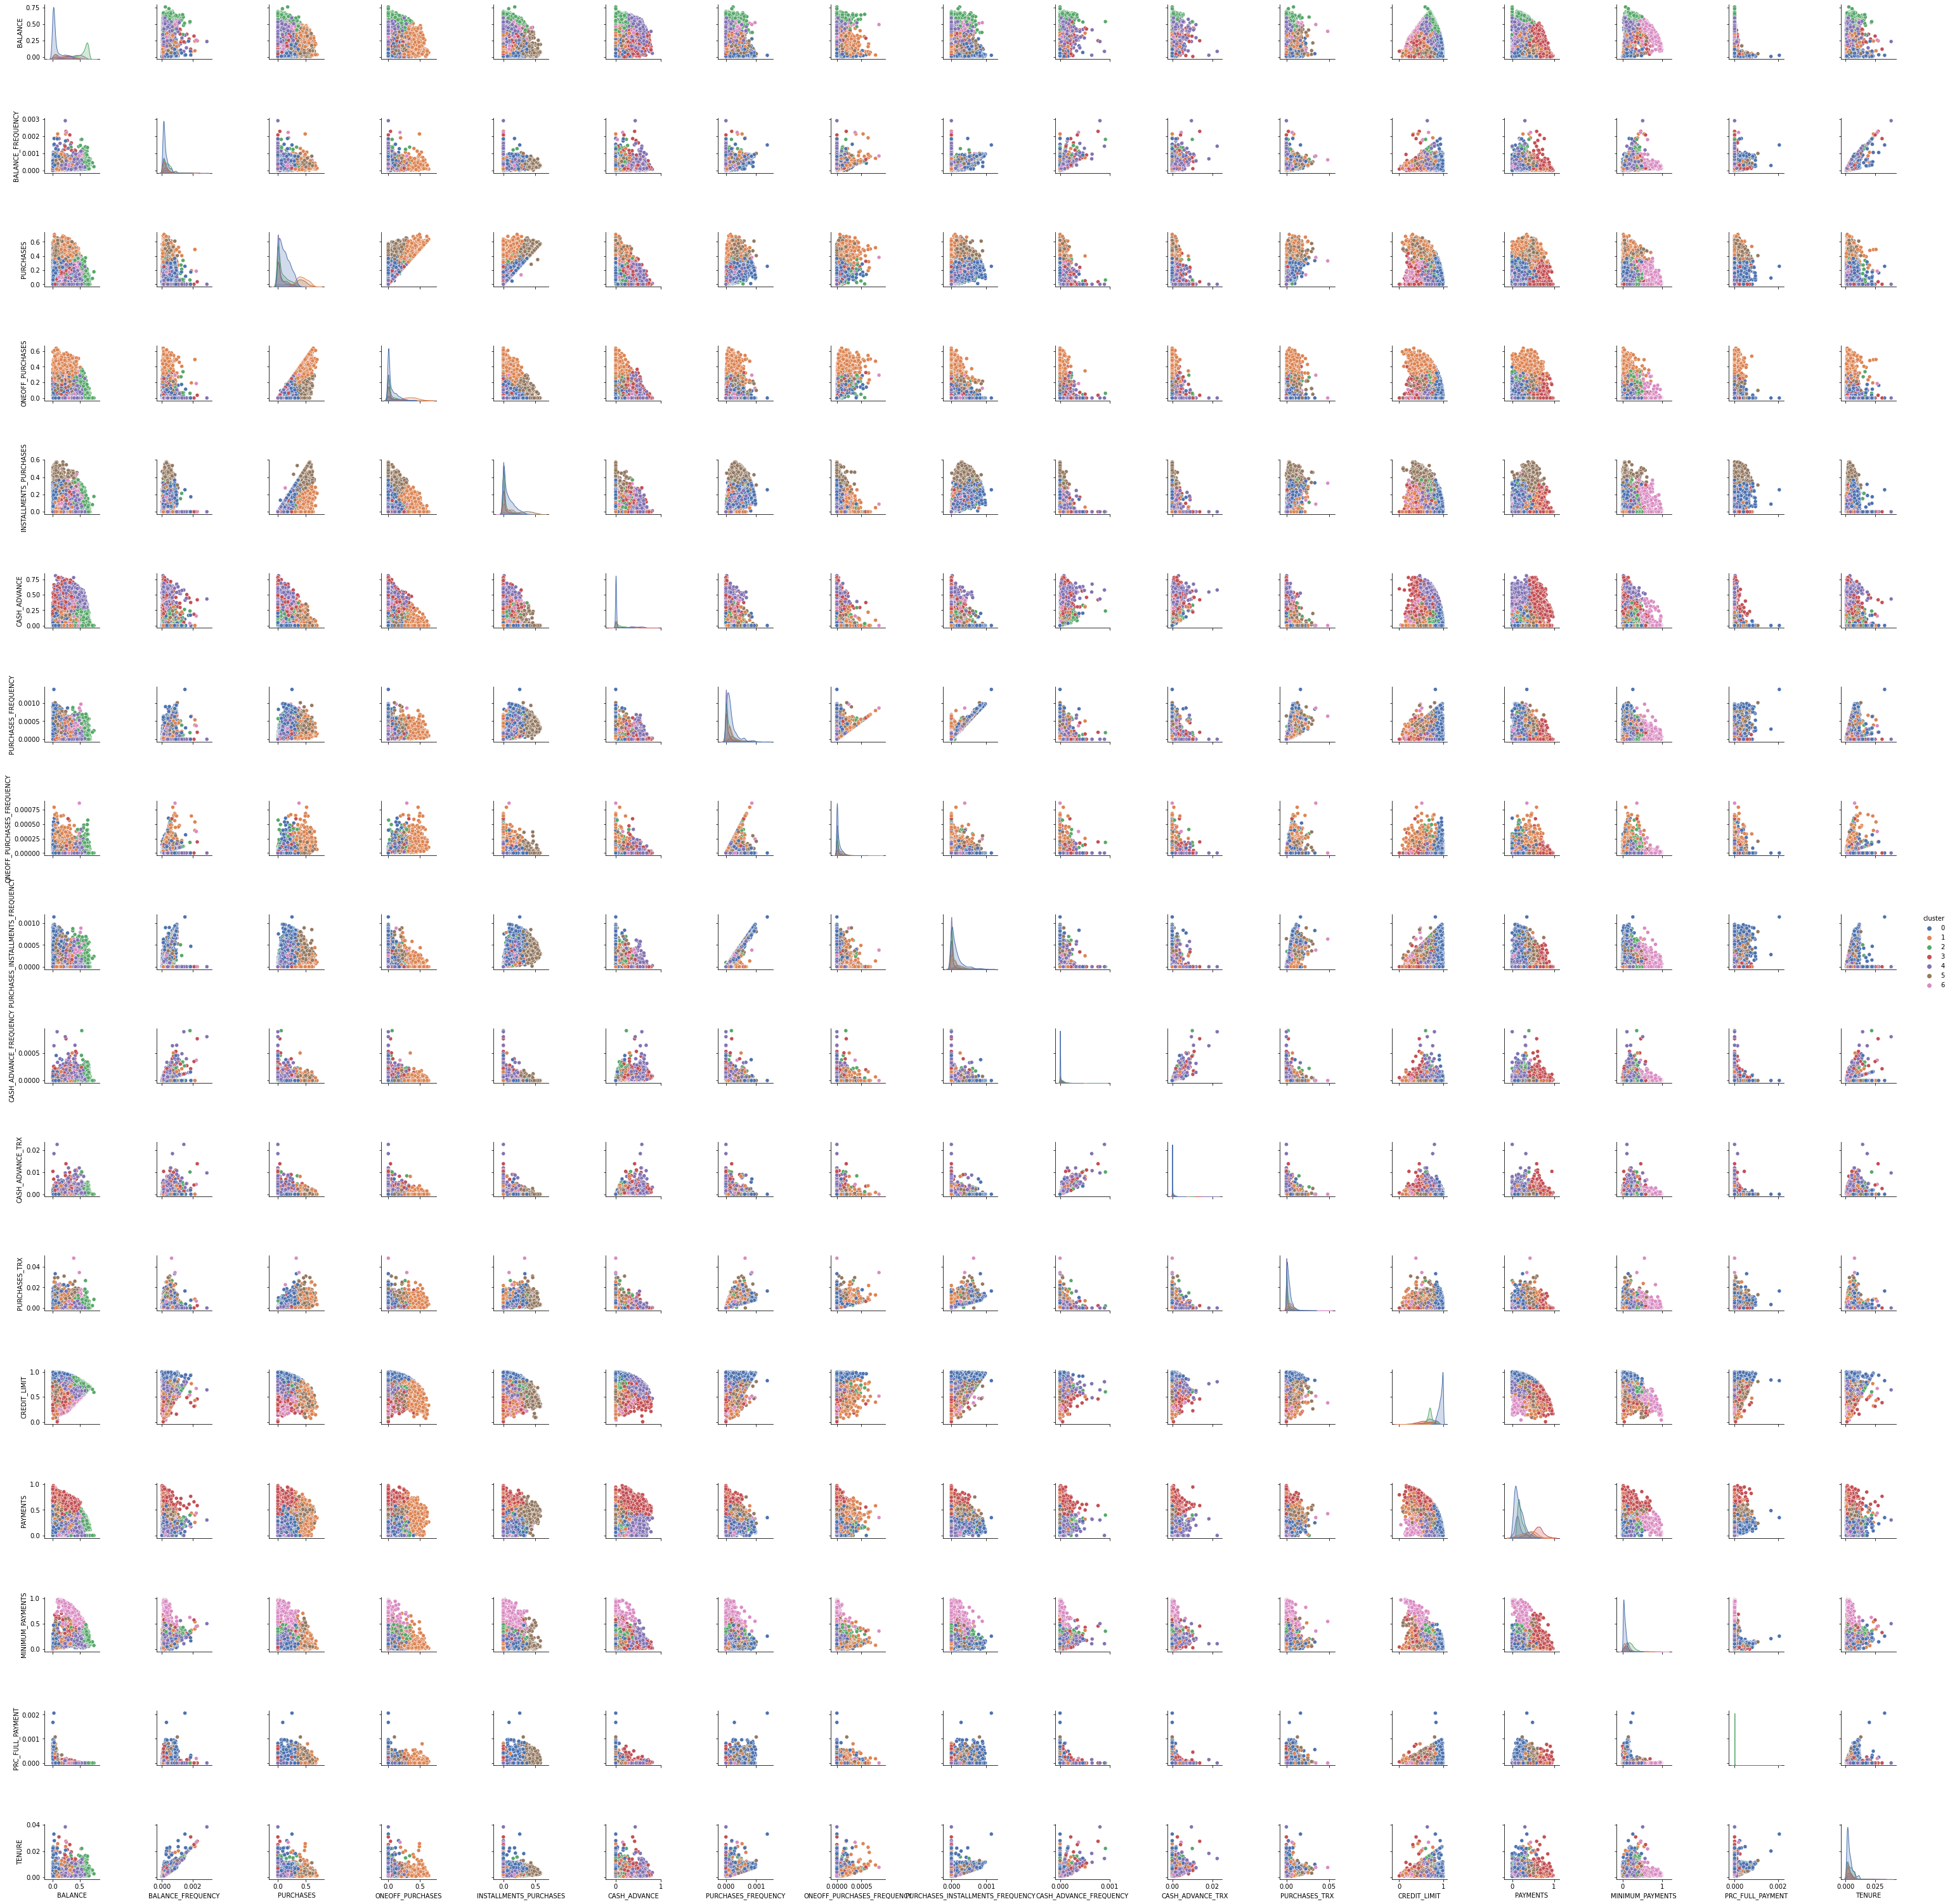

In [61]:
import seaborn as sns
df_scaled["cluster"] = y_pred3
cols = list(df_scaled.columns)
sns.pairplot( df_scaled[ cols ], hue="cluster" , palette='deep')

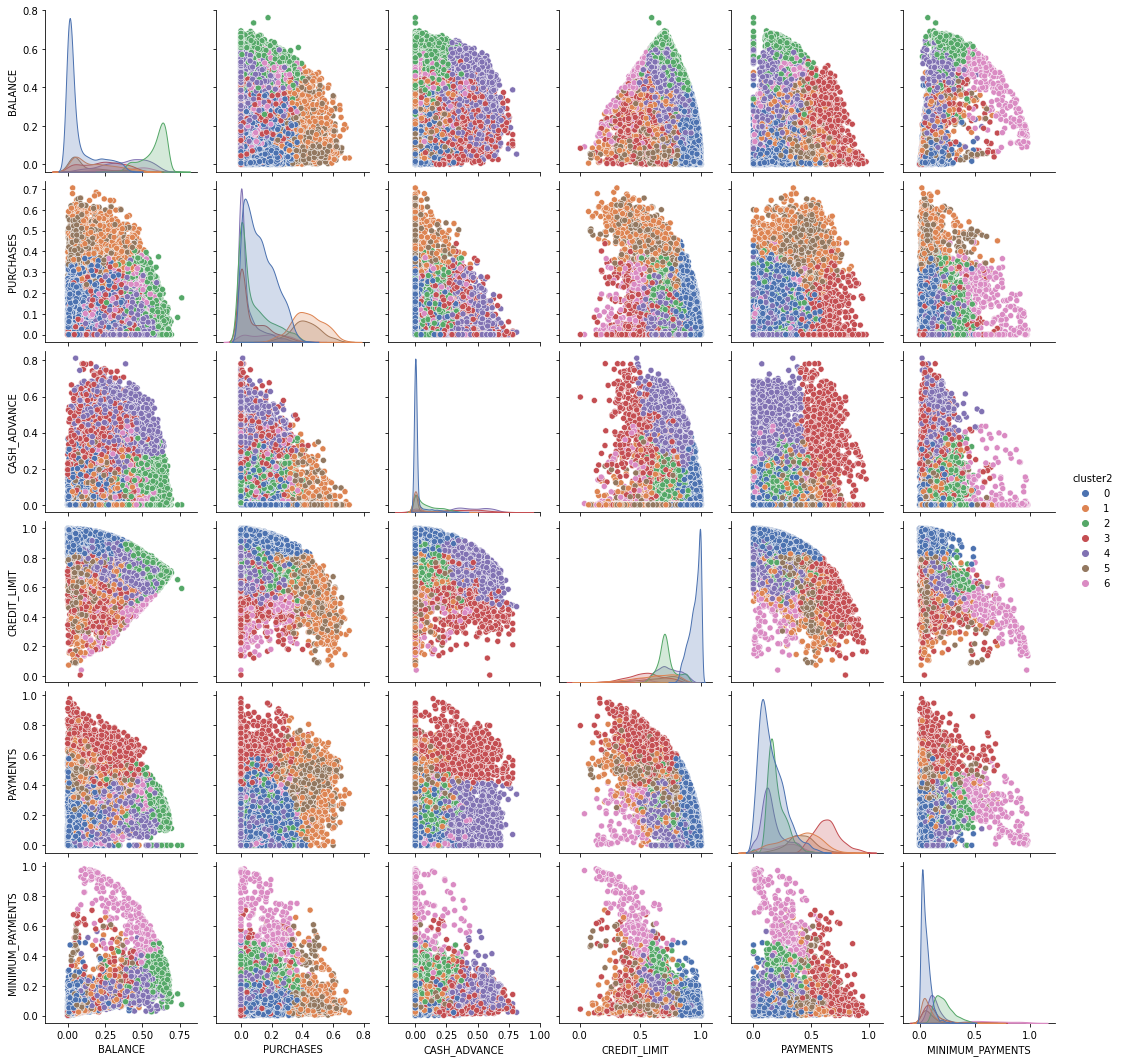

In [62]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
model = KMeans(n_clusters=7, init="k-means++", n_init=10, max_iter=300)
y_pred = model.fit_predict( df_scaled[best_cols] )

df_scaled["cluster2"] = y_pred3
best_cols.append("cluster2")
sns.pairplot( df_scaled[ best_cols ], hue="cluster2" , palette='deep')

The goal was to segment the customers in order to define a marketing strategy. Unfortunately the colors of the plots change when this kernel is rerun - but here are some thoughts:

Big Spenders with large Payments : they make expensive purchases and have a credit limit that is between average and high. This is only a small group of customers.

Cash Advances with large Payments : this group takes the most cash advances. They make large payments, but this appears to be a small group of customers.

Medium Spenders with third highest Payments : the second highest Purchases group (after the Big Spenders).

Highest Credit Limit but Frugal : this group doesn't make a lot of purchases. It looks like the 3rd largest group of customers.

Cash Advances with Small Payments : this group likes taking cash advances, but make only small payments.

Small Spenders and Low Credit Limit : they have the smallest Balances after the Smallest Spenders, their Credit Limit is in the bottom 3 groups, the second largest group of customers.

Smallest Spenders and Lowest Credit Limit : this is the group with the lowest credit limit but they don't appear to buy much. Unfortunately this appears to be the largest group of customers.

Highest Min Payments : this group has the highest minimum payments (which presumably refers to "Min Payment Due" on the monthly statement. This might be a reflection of the fact that they have the second lowest Credit Limit of the groups, so it looks like the bank has identified them as higher risk.)

So a marketing strategy that targeted the first five groups might be effective.
